## Computer Vision - Assignment 1  

#### Maggie Ezzat Gamil Gaid       T-16       37-575   
#### Mariz Samir Mounir Awad      T-12       37-2632

### Problem 1:

In [1]:
from PIL import Image
import numpy as np 
import math
import matplotlib.pyplot as plt

In [16]:
def getLOGkernel(sigma):
    
    s = 2 * math.ceil(3*sigma) + 1
    r = math.floor(s/2)
    
    kernel = np.zeros(shape=(s,s))

    for x in range(-r, r+1):
        for y in range(-r, r+1):
            
            f0 = ( (x**2) + (y**2) ) / ( 2* (sigma**2) )
            f1 = -1 / ( (math.pi) * (sigma**4) )
            f2 = 1 - f0
            f3 = math.exp(-1* (f0))
            val = (f1)*(f2)*(f3)
            kernel[x+r][y+r] = val
    
    return kernel


In [24]:
def get_zero_crossings(arr):
    
    zero_cross = np.zeros(arr.shape)
    
    for i in range(1, arr.shape[0]-1):
        for j in range(1, arr.shape[1]-1):
            
            if arr[i][j] > 0:
                if arr[i+1][j] <0 or arr[i-1][j] <0 or arr[i][j+1] <0 or arr[i][j-1]<0:
                    zero_cross[i][j] = 255
            elif arr[i][j] <0: 
                if arr[i+1][j] >=0 or arr[i-1][j] >=0 or arr[i][j+1] >=0 or arr[i][j-1]>=0:
                    zero_cross[i][j] = 255
                    
    return zero_cross
                

In [12]:
def applyPrewitt(img):
    
    prewitt = np.zeros(shape=img.shape, dtype=np.float64)

    for i in range (1,img.shape[0]-1):
        for j in range (1,img.shape[1]-1):
            h1 = int(img[i-1][j-1]) + int(img[i-1][j]) + int(img[i-1][j+1]) - int(img[i+1][j-1]) - int(img[i+1][j]) - int(img[i+1][j+1])
            h2 = int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]) - int(img[i-1][j-1]) - int(img[i][j-1]) - int(img[i+1][j-1]) 

            prewitt[i][j] = np.float64(( (np.float64(h1))**2 + (np.float64(h2))**2 )**0.5)
    
    return prewitt

In [14]:
def applyLOG(image, sigma, t=0.1):
    
    kernel = getLOGkernel(sigma)
    #kernel = np.array([[0,0,0,1,1,1,0,0,0],[0,0,2,3,4,3,2,0,0],[0,2,4,5,4,5,4,2,0],
    #          [1,3,5,-6,-18,-6,5,3,1],[1,4,4,-18,-40,-18,4,4,1],[1,3,5,-6,-18,-6,5,3,1],
    #          [0,2,4,5,4,5,4,2,0], [0,0,2,3,4,3,2,0,0], [0,0,0,1,1,1,0,0,0]])
    
    image = image.convert('L')
    img = np.array(image)
    
    conv_img = np.zeros(shape=(256,256))
    
    r = math.floor((kernel.shape[0])/2)

    for i in range (r,img.shape[0]-r):
        for j in range (r,img.shape[1]-r):
            val = 0
            for k in range(-r, r+1):
                for l in range(-r,r+1):
                    val += img[i+k][j+l]*kernel[k+r][l+r]

            conv_img[i][j] = val

    zero_crossings = get_zero_crossings(conv_img)
    prewitt = applyPrewitt(img)
    
    for i in range(zero_crossings.shape[0]):
        for j in range(zero_crossings.shape[1]):
            if zero_crossings[i][j]==255:
                if prewitt[i][j] < t:
                    zero_crossings[i][j]=0
                    
    output_img = zero_crossings
    #output_img = zero_crossings * (255/ zero_crossings.max())
    #output_img = output_img.astype('uint8')
    #output_img = Image.fromarray(output_img)
    return output_img
        

In [17]:
img = Image.open("Cameraman.png")

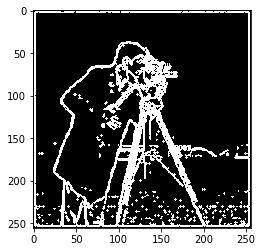

In [18]:
edges = applyLOG(img, 0.5)
plt.imshow(edges, cmap="gray")

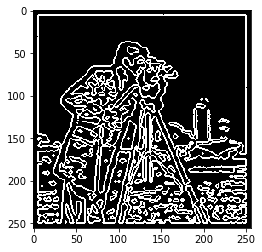

In [19]:
edges = applyLOG(img, 2)
plt.imshow(edges, cmap="gray")

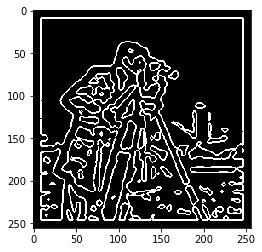

In [20]:
edges = applyLOG(img, 3)
plt.imshow(edges, cmap="gray")

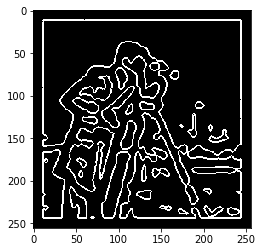

In [22]:
edges = applyLOG(img, 4)
plt.imshow(edges, cmap="gray")

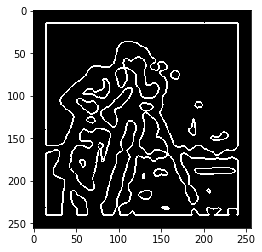

In [23]:
edges = applyLOG(img, 5)
plt.imshow(edges, cmap="gray")

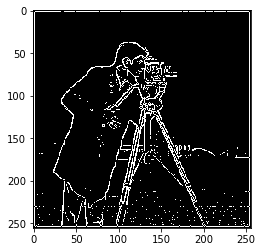

In [25]:
edges = applyLOG(img, 0.5)
plt.imshow(edges, cmap="gray")

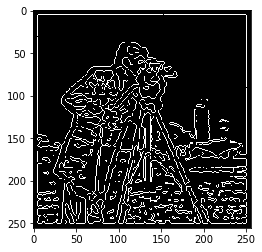

In [26]:
edges = applyLOG(img, 2)
plt.imshow(edges, cmap="gray")

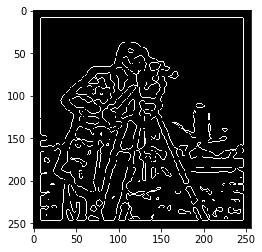

In [27]:
edges = applyLOG(img, 3)
plt.imshow(edges, cmap="gray")

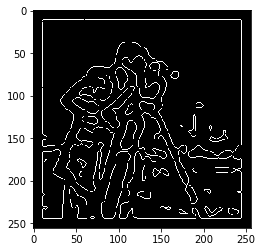

In [28]:
edges = applyLOG(img, 4)
plt.imshow(edges, cmap="gray")

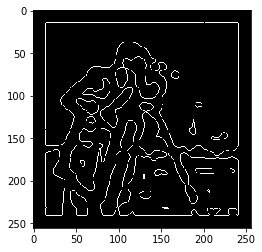

In [29]:
edges = applyLOG(img, 5)
plt.imshow(edges, cmap="gray")